In [30]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

$\newcommand{\normalN}{\mathcal{N}}$

# Introduction

The working example we will use in this notebook is determining the orientation tuning of a neuron. To do this, we might perform an experiment where a monochrome grating is shown to the animal while the recording from the neuron of interest. Repeating the experiment with different grating orientations, we would obtain the firing rate $f$ of this neuron as a function of the orientation $θ$.

<img src='./orientation-tuning_plot.png' style='width: 50%'/>

Clearly this neuron responds preferentially to grating orientations around 90°, but how precise can we be with this number&nbsp;? A proper analysis of the data should provide us not only with a point estimate, but also with the range of values that are consistent with the data.

# Loading and plotting the data

This first step to any data analysis is to grab the data. We've provided the data for the plot above in the file `orientation-tuning_data.npz`. It comprises two Numpy arrays:

* `θarr`: the array of orientations
* `farr`: the array of corresponding measured firing rates

In [122]:
data = np.load("orientation-tuning_data.npz")
θarr = data['θarr']
farr = data['farr']

# Defining a model

## On the ubiquity of models
Any interpretation of data implies an underlying model of how the different variables in that data are related. For example, a typically used measure to show that two variables are related is the *correlation coefficient*, which takes values between -1 and 1 (with 0 corresponding fully uncorrelated variables). However, applying this measure to data implicitly assumes a *linear* relationship between the variables—effectively, computing the correlation is akin to imposing a linear model to data. That is why, despite the plot above clearly showing a relationship between $θ$ and $f(θ)$, the correlation between those two quantities is a minuscule $r = -0.043$:

In [136]:
np.corrcoef(θarr, farr)

array([[ 1.       , -0.0429521],
       [-0.0429521,  1.       ]])

Thankfully, a model doesn't have a be perfect to be useful. In data analysis, the game is not to find the “perfect“ model, but rather a “good enough” model, that explains the data sufficiently well. We can then compute statistics that tell us how well *that* model fits the data.

## Our toy model
When choosing a model, a good principle is to apply Occam's razor: make it as simple as possible, adding only as much complexity as required to explain the feature that interests us.

In this case, we need a model that minimally:

- captures the orientation corresponding to maximum neural response: $θ_0$;
- is periodic (rotating the grating by 180° should give the same response);
- ensures $f(θ)$ is always positive;
- includes observation noise.

A possible model with these characteristics would be
$$f(θ) = α \cos( 2(θ - θ_0) ) + β + σ \normalN(0, 1) \,,$$
with the additional constraint that negative values of $f(θ)$ be clipped to 0.

It is important to stress that this only *a* model: plenty of other models would also appropriately explain our data. They may involve different parameters, which would take on different values, but they should all agree on common attributes: **any sufficiently expressive model will give comparable estimates of the range of possible $θ_0$.**

In [118]:


plt.scatter(θarr/np.pi, farr)
plt.xlabel("$θ$ (radians)")
plt.ylabel("f(θ)")

In [120]:
data['θarr']

array([ 0.        ,  0.03173326,  0.06346652,  0.09519978,  0.12693304,
        0.1586663 ,  0.19039955,  0.22213281,  0.25386607,  0.28559933,
        0.31733259,  0.34906585,  0.38079911,  0.41253237,  0.44426563,
        0.47599889,  0.50773215,  0.53946541,  0.57119866,  0.60293192,
        0.63466518,  0.66639844,  0.6981317 ,  0.72986496,  0.76159822,
        0.79333148,  0.82506474,  0.856798  ,  0.88853126,  0.92026451,
        0.95199777,  0.98373103,  1.01546429,  1.04719755,  1.07893081,
        1.11066407,  1.14239733,  1.17413059,  1.20586385,  1.23759711,
        1.26933037,  1.30106362,  1.33279688,  1.36453014,  1.3962634 ,
        1.42799666,  1.45972992,  1.49146318,  1.52319644,  1.5549297 ,
        1.58666296,  1.61839622,  1.65012947,  1.68186273,  1.71359599,
        1.74532925,  1.77706251,  1.80879577,  1.84052903,  1.87226229,
        1.90399555,  1.93572881,  1.96746207,  1.99919533,  2.03092858,
        2.06266184,  2.0943951 ,  2.12612836,  2.15786162,  2.18

In [98]:
class NeuronModel:
    
    def __init__(self, θ0, α, β, σ):
        self.α = α
        self.β = β
        self.σ = σ
        self.θ0 = θ0
        
    def f(self, θ):
        return np.clip(self.α * np.cos((θ - self.θ0)*2) + self.β + self.σ * np.random.normal(0, 1),
                       0, np.inf)
        return retval

In [111]:
neuron = NeuronModel(np.pi/2, 1.8, 10, 0.6)

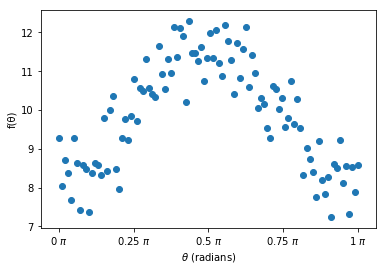

In [112]:
#θarr = np.random.uniform(0, np.pi, 15)
θarr = np.linspace(0, np.pi, 100)
farr = np.array([neuron.f(θ) for θ in θarr])
plt.scatter(θarr/np.pi, farr)
plt.xlabel("$θ$ (radians)")
plt.ylabel("f(θ)")
# Magic incantation for radians from http://stackoverflow.com/a/40642200
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(base=0.25))

In [116]:
np.savez("regression_orientation-tuning_data.npz", θarr=θarr, farr=farr)

# Library

Set of functions used in this notebook